<a href="https://colab.research.google.com/github/BachiLi/redner/blob/master/tutorials/hello_redner_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the first tutorial of redner. In this tutorial we will load a 3D object and render it with redner.

In [1]:
!pip install --upgrade redner-gpu

     |████████████████████████████████| 33.1MB 45.9MB/s 


In [2]:
# Tensorflow by default allocates all GPU memory, leaving very little for rendering.
# We set the environment variable TF_FORCE_GPU_ALLOW_GROWTH to true to enforce on demand
# memory allocation to reduce page faults.
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
%tensorflow_version 2.x
import tensorflow as tf
tf.compat.v1.enable_eager_execution() # redner only supports eager mode

TensorFlow 2.x selected.


In [0]:
# pyredner will be the main Python module we import for redner.
import pyredner_tensorflow as pyredner

We begin by loading a [Wavefront object file](https://en.wikipedia.org/wiki/Wavefront_.obj_file), that contains the description of geometry and material of 3D objects. 

We will download the famous [Utah teapot](https://en.wikipedia.org/wiki/Utah_teapot) from Morgan McGuire's awesome [website](https://casual-effects.com/data/):

In [0]:
import urllib
import zipfile
# wget
filedata = urllib.request.urlretrieve('https://casual-effects.com/g3d/data10/common/model/teapot/teapot.zip', 'teapot.zip')
# unzip
zip_ref = zipfile.ZipFile('teapot.zip', 'r')
zip_ref.extractall('teapot/')

In [0]:
# Now we load the obj file using pyredner.load_obj. Since we set return_objects=True,
# load_obj returns a list of redner "Object", which contains geometry, material, and lighting information.
objects = pyredner.load_obj('teapot/teapot.obj', return_objects=True)

Now the teapot geometry is stored in `objects`. To render the scene, we need to have a camera. Redner provides an automatic camera placement function we can use for this. It uses the bounding boxes of the objects to find a position where you can see all the objects.

In [0]:
camera = pyredner.automatic_camera_placement(objects, resolution = (512, 512))

Once we have the objects and camera, we can build a redner "Scene":

In [0]:
scene = pyredner.Scene(camera = camera, objects = objects)

Now we can render the scene. Since we did not set up the light sources, we visualize the albedo color of the teapot here.

Scene construction, time: 0.02513 s
Forward pass, time: 0.03538 s


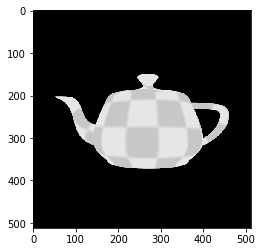

In [9]:
img = pyredner.render_albedo(scene)
# Visualize img
from matplotlib.pyplot import imshow
%matplotlib inline
# Need to gamma compress the image for displaying.
imshow(tf.pow(img, 1.0/2.2))